In [1]:
# Setup
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams

#regression library
import statsmodels.formula.api as smf

# Preprocessing library
from sklearn import preprocessing

# knn library
from sklearn import neighbors

# knn classifier library
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Set some Pandas options as you like
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

rcParams['figure.figsize'] = 7, 5
rcParams['font.size'] = 10

In [4]:
df = pd.read_csv('./Datasets/owid-energy-data.csv')

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [65]:
countries = ['Australia', 'Germany', 'Cananda', 'United Kingdom']
df1 = df[['country', 'year', 'population','gdp','primary_energy_consumption']][(df['year'] > 1900) & (df['country'].isin(countries))]
df1

,country,year,population,gdp,primary_energy_consumption
1476,Australia,1901,3755077.0,2.322160e+10,NaN
1477,Australia,1902,3815607.0,2.346190e+10,NaN
1478,Australia,1903,3874926.0,2.531231e+10,NaN
1479,Australia,1904,3935167.0,2.701432e+10,NaN
1480,Australia,1905,3996345.0,2.732730e+10,NaN
...,...,...,...,...,...
20547,United Kingdom,2017,66064808.0,2.506604e+12,2247.062
20548,United Kingdom,2018,66432996.0,2.540210e+12,2237.628
20549,United Kingdom,2019,66778660.0,NaN,2185.358
20550,United Kingdom,2020,67059472.0,NaN,1961.168


<AxesSubplot:xlabel='year', ylabel='population'>

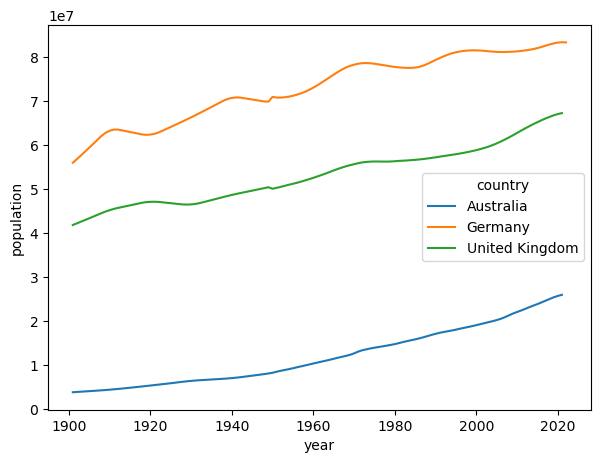

In [66]:
sns.lineplot(x = 'year', y = 'population', hue = 'country', data = df1)

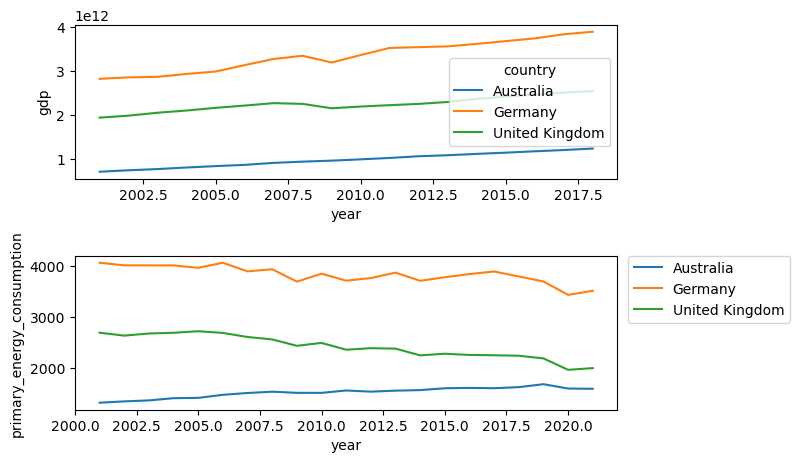

In [44]:
fig, axs = plt.subplots(2)
sns.lineplot(x = 'year', y = 'gdp', hue = 'country', data = df1, ax = axs[0])

# Was trying to place the legend outside of the upper plot but gave up
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.subplots_adjust( hspace=0.5)
sns.lineplot(x = 'year', y = 'primary_energy_consumption', hue = 'country', data = df1, ax = axs[1])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [4]:
# Rereading the 'owid-energy-data.csv' back into the notebook so that it can be changed above
df_energy = pd.read_csv('.\Datasets\owid-energy-data.csv')

In [5]:
df_energy['gdp_per_capita'] = df_energy.apply(lambda x: x.gdp/x.population, axis = 1)
df_energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,...,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,gdp_per_capita
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,NaN,NaN,NaN,NaN,21.693,0.32,4.354,NaN,363.265,NaN,NaN,NaN,NaN,204.730,3.02,8.375,1.697,1488.509,21.957,41.088,...,NaN,NaN,NaN,291.504,4.30,NaN,58.503,NaN,NaN,NaN,NaN,0.678,0.01,NaN,0.136,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1487.877848
21886,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,0.39,4.244,NaN,355.822,NaN,NaN,NaN,NaN,245.147,3.69,14.336,3.148,1667.861,25.105,40.152,...,NaN,NaN,NaN,362.738,5.46,NaN,59.412,NaN,NaN,NaN,NaN,1.329,0.02,NaN,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1509.106089
21887,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,0.38,4.612,NaN,387.136,NaN,NaN,NaN,NaN,235.760,3.62,-21.529,-5.405,1283.004,19.700,43.932,...,NaN,NaN,NaN,298.282,4.58,NaN,55.583,NaN,NaN,NaN,NaN,1.954,0.03,NaN,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
21888,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,0.35,4.605,NaN,389.474,NaN,NaN,NaN,NaN,215.065,3.37,3.004,0.592,1294.978,20.292,44.342,...,NaN,NaN,NaN,267.396,4.19,NaN,55.132,NaN,NaN,NaN,NaN,1.915,0.03,NaN,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN


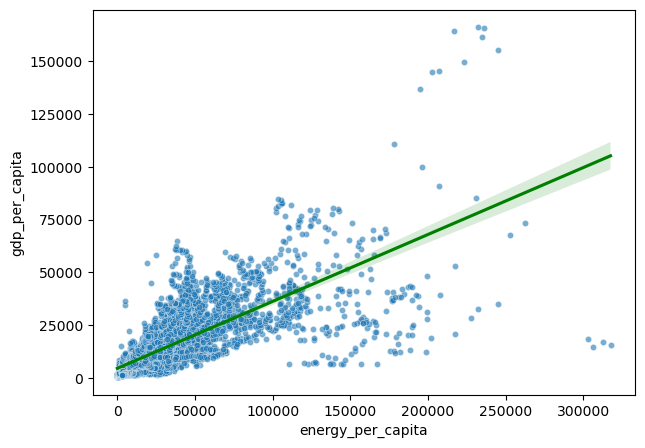

In [52]:
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', data = model_df2, s = 20, alpha = 0.6)
sns.regplot(x = 'energy_per_capita', y = 'gdp_per_capita', data = model_df2, scatter = False, color = 'g')
plt.show()

The above graph shows that there is a positive relationship between 'gdp_per_capita' and 'energy_per_capita'.

 ##### Now exploring the gdp_per_capita and energy_per_capita relationship
 First I will find what data I have and how the countries differ.

C:\Users\cnc\AppData\Local\Temp\ipykernel_1568\760465961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(inplace = True)


<AxesSubplot:xlabel='year', ylabel='Count'>

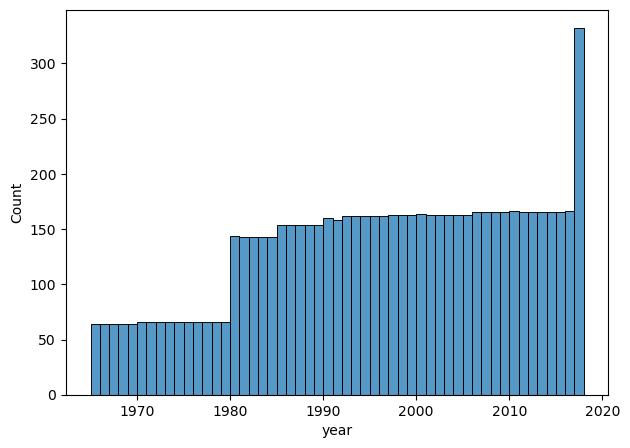

In [8]:
# Finding the distribution of gdp records
test_df = df_energy[['year', 'energy_per_capita', 'gdp_per_capita']]
test_df.dropna(inplace = True)
sns.histplot(x = 'year', data = test_df, bins = (max(test_df.year) - min(test_df.year)))

This graph shows that the years 1980 to 2018 are the years with the most data after the NAN values have been removed.

<AxesSubplot:xlabel='energy_per_capita', ylabel='Count'>

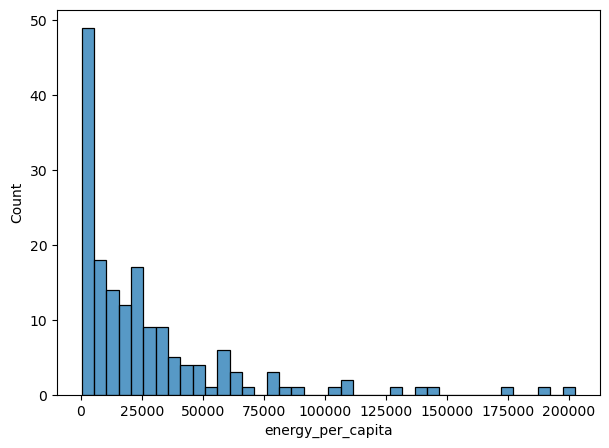

In [9]:
# What countries have increased their energy_per_capita consumption the most for the period 1980 to 2018, the years with the least missing data.
firstYear = 1980
lastYear = 2018

# Removing values outside of these ranges from the dataset so that I can compare like for like
df_energy = df_energy[(df_energy['year'] >= firstYear) & (df_energy['year'] <= lastYear)]

# 2018 is the latest year that has good gdp_per_capita data so I will use this as the latest year
# Taking a snapshot of the energy distribution at the previous energy consumption that I am looking at
snapshot_df = df_energy[['country','energy_per_capita', 'gdp_per_capita', 'year']][df_energy['year'] == lastYear]
snapshot_df.dropna(inplace = True)
sns.histplot(x = 'energy_per_capita', data = snapshot_df, bins = 40)

I'll make bins of energy_per_capita at less than 1000, 1000 - 20000, greater than 20000 to classify the countries into.  I have made this decision iteratively. Based on the above graph and by trying different values for 'energy_per_capita'.

In [10]:
model_df = df_energy[['country','energy_per_capita', 'gdp_per_capita', 'year']][(df_energy['year'] == firstYear) | (df_energy['year'] == lastYear)]
counts = model_df[['country']].groupby('country').value_counts()
countries = counts[counts.isin([2])]
# These are the countries that we can work with
countries = list(countries.index)
# Filter model_df so that only these countries are in it
model_df = model_df[model_df['country'].isin(countries)]

In [11]:
# Creating a energy_dif column
model_df['previous_energy_per_capita'] = model_df['energy_per_capita'].shift(1)
model_df = model_df[model_df['year'] == lastYear]
model_df['energy_dif'] = model_df.apply(lambda x: x.energy_per_capita - x.previous_energy_per_capita, axis = 1)
model_df = model_df.dropna()
model_df

,country,energy_per_capita,gdp_per_capita,year,previous_energy_per_capita,energy_dif
118,Afghanistan,1144.532,1842.488066,2018,623.929,520.603
558,Albania,14483.855,11820.955154,2018,16237.574,-1753.719
679,Algeria,16012.625,14079.648889,2018,9452.979,6559.646
843,Angola,3165.137,5625.509125,2018,2053.460,1111.677
1047,Argentina,22143.709,18673.861919,2018,16841.475,5302.234
...,...,...,...,...,...,...
21199,Vietnam,11443.453,6969.320822,2018,1022.307,10421.146
21508,World,21053.754,14788.297698,2018,17536.699,3517.055
21550,Yemen,1168.473,2242.337522,2018,3040.326,-1871.853
21764,Zambia,3472.000,3418.870329,2018,6819.864,-3347.864


In [23]:
model_df = df_energy[['country','energy_per_capita', 'gdp_per_capita', 'year']][(df_energy['year'] == firstYear) | (df_energy['year'] == lastYear)]
model_df['previous_energy_per_capita'] = model_df['energy_per_capita'].shift(1)
model_df = model_df[model_df['year'] == lastYear]
model_df['energy_dif'] = model_df.apply(lambda x: x.energy_per_capita - x.previous_energy_per_capita, axis = 1)
model_df = model_df.dropna()
model_df['energy_dif_proportion'] = model_df.apply(lambda x: x.energy_dif/x.energy_per_capita, axis = 1)

# Dividing the countries based on energy_dif_proportion and initial energy usage
# so that I am comparing like for like countries
# Finding how quickly and slowly developing the low energy usage countries are
low_countries = model_df[model_df['previous_energy_per_capita'] < 1000]
quicklyDevelopingLowCountries = low_countries.nlargest(10, 'energy_dif_proportion')
slowlyDevelopingLowCountries = low_countries.nsmallest(10, 'energy_dif_proportion')

# Finding how quickly and slowly developing the middle energy usage countries are
middleCountries = model_df[(model_df['previous_energy_per_capita'] >= 1000) & (model_df['previous_energy_per_capita'] < 20000)]
quicklyDevelopingMiddleCountries = middleCountries.nlargest(10, 'energy_dif_proportion')
slowlyDevelopingMiddleCountries = middleCountries.nsmallest(10, 'energy_dif_proportion')

# Finding how quickly and slowly developing the high energy usage countries are (developing as in increasing their energy consumption)
highCountries = model_df[(model_df['previous_energy_per_capita'] >= 20000)]
quicklyDevelopingHighCountries = highCountries.nlargest(10, 'energy_dif_proportion')
slowlyDevelopingHighCountries = highCountries.nsmallest(10, 'energy_dif_proportion')

In [13]:
quicklyDevelopingLowCountries

,country,energy_per_capita,gdp_per_capita,year,previous_energy_per_capita,energy_dif,energy_dif_proportion
6150,Estonia,58728.527,26781.780820,2018,883.893,57844.634,0.984950
20304,Ukraine,22768.459,9704.150430,2018,845.500,21922.959,0.962865
7605,Georgia,19383.402,15636.200892,2018,978.746,18404.656,0.949506
6085,Equatorial Guinea,16530.709,15145.851283,2018,884.108,15646.601,0.946517
3475,Cambodia,3668.622,3715.504088,2018,213.394,3455.228,0.941833
13034,Nepal,1749.518,2843.275428,2018,140.716,1608.802,0.919569
2079,Bangladesh,2485.826,4194.191121,2018,414.041,2071.785,0.833439
12838,Myanmar,3472.857,6030.435701,2018,605.126,2867.731,0.825756
2445,Benin,2736.800,2234.547471,2018,498.895,2237.905,0.817709
10703,Lesotho,2183.337,2438.727304,2018,424.752,1758.585,0.805457


In [14]:
# Creating two dataframes so that it is easier to see the two groups for the quickly developing low energy usage countries
fastestDevLowCountries = quicklyDevelopingLowCountries[quicklyDevelopingLowCountries['energy_per_capita'] > 5000]
middleDevLowCountries = quicklyDevelopingLowCountries[quicklyDevelopingLowCountries['energy_per_capita'] <= 5000]

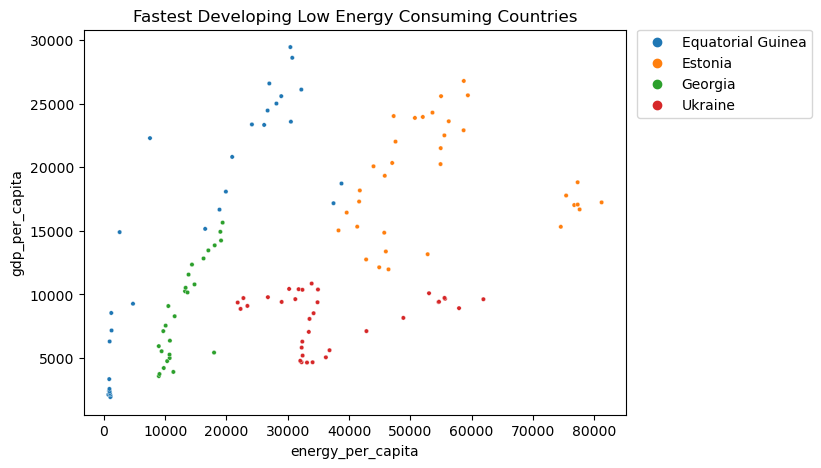

In [16]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(fastestDevLowCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Fastest Developing Low Energy Consuming Countries")
plt.show()

Some countries are showing positive relationship between energy_per_capita and gdp_per_capita while other countries are not.  Its all over the place.

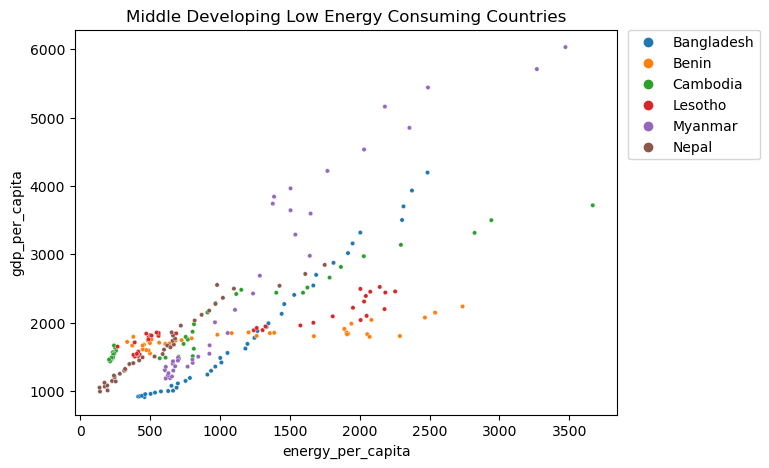

In [17]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(middleDevLowCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Middle Developing Low Energy Consuming Countries")
plt.show()

This plot shows a positive relationship between gdp per capita and energy per capita for most countries.  Two countries, Benin and Lesotho, have increasing energy per capita's but their gdp per capita is not increasing by very much.

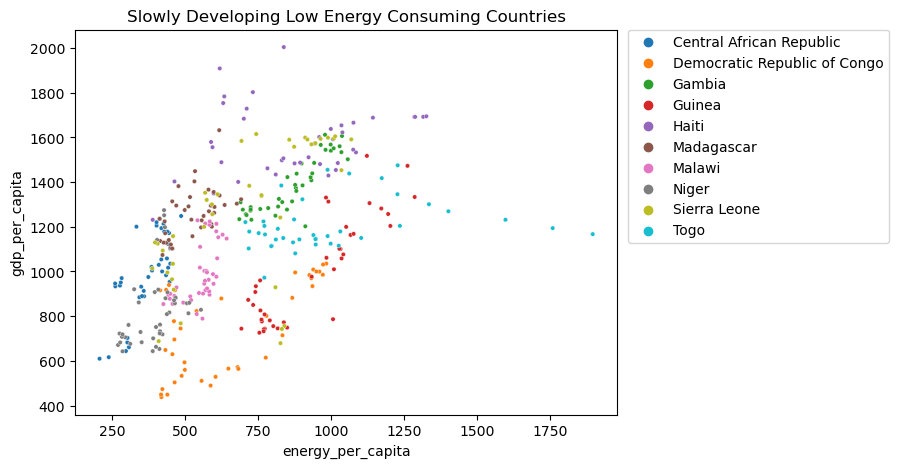

In [18]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(slowlyDevelopingLowCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Slowly Developing Low Energy Consuming Countries")
plt.show()

This plot is of the countries that use the least energy and have not been developing much more energy usage since 1980.  Again, this plot is a bit of a mess.  None of the countries have significantly increased either their energy per capita or their gdp per capita since 1980.

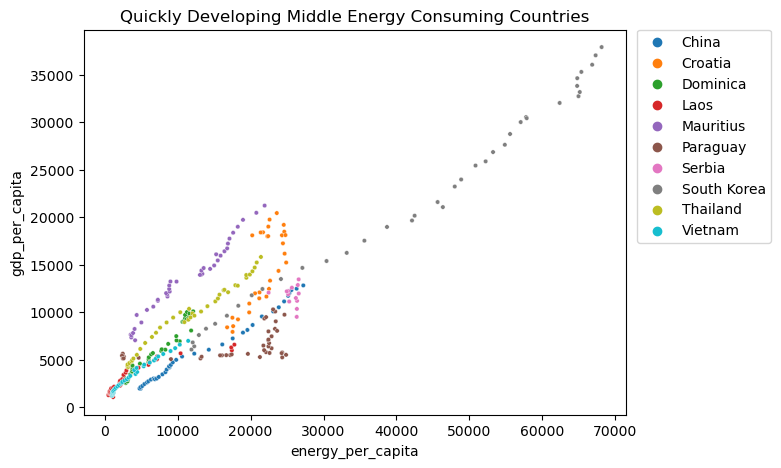

In [19]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(quicklyDevelopingMiddleCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Quickly Developing Middle Energy Consuming Countries")
plt.show()

This plot shows a clear positive relationship between gdp per capita and energy per capita.

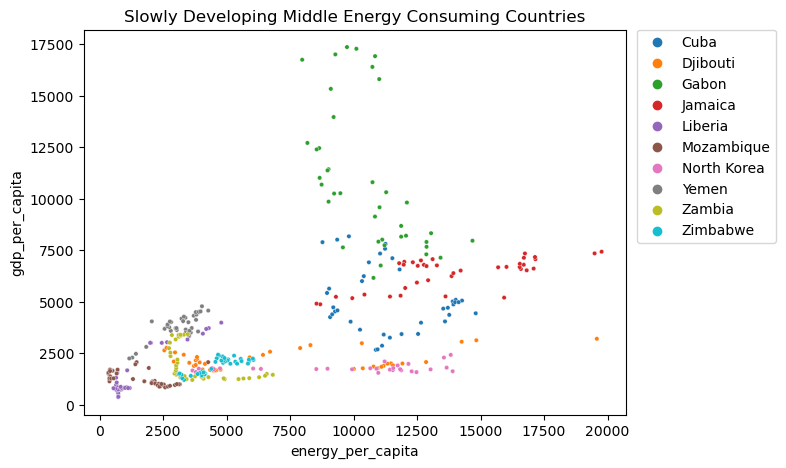

In [20]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(slowlyDevelopingMiddleCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Slowly Developing Middle Energy Consuming Countries")
plt.show()

North Korea and Jamaica have significant increases in their energy per capita, while their gdp per capita does not increase much.  Gabon has quite a large increase in gdp per capita while energy per capita does not tend to increase.

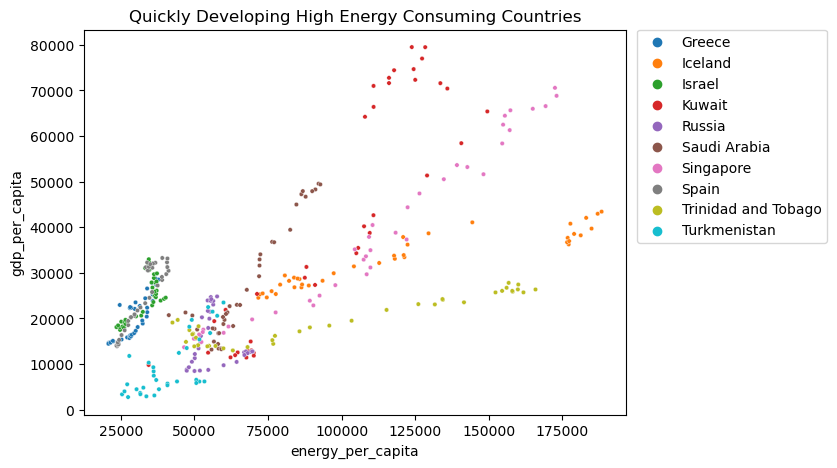

In [24]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(quicklyDevelopingHighCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Quickly Developing High Energy Consuming Countries")
plt.show()

This plot shows a clear positive relationship between energy per capita and gdp per capita for most of these countries.  The exception is russia, which has quite a strange looking plot.

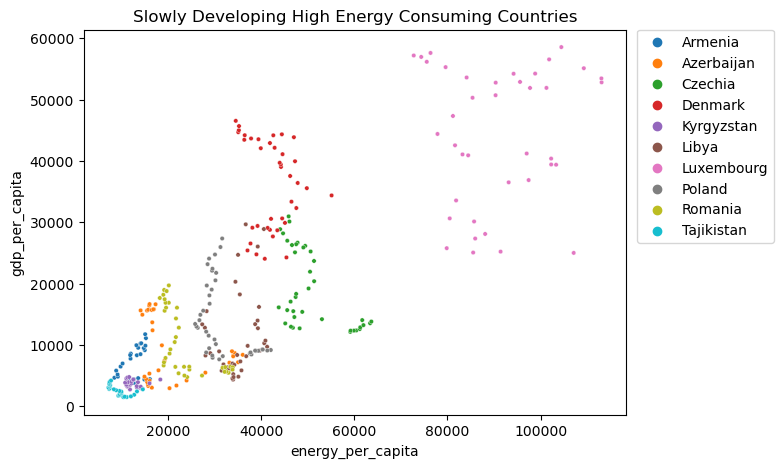

In [26]:
model_df = df_energy[['country','year','energy_per_capita', 'gdp_per_capita']]
model_df = model_df[model_df['country'].isin(slowlyDevelopingHighCountries.country)]
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', hue = 'country', data = model_df, s = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Slowly Developing High Energy Consuming Countries")
plt.show()

This plot shows that there are some countries that have increasing gdp per capita while their energy per capita is not increasing.

Overall though, in most of the plots, gdp per capita increases with energy per capita.  There are a lot of idiosyncrasies between the different countries, this is important as it shows that many other things affect gdp, not just energy.  Among the highest energy using countries, some have had decreased energy usage while having a higher gdp.  Notably, this behaviour is not present among the lowest energy using countries.  This means that it is possible for a country to conserve resources while producing more if it is already a well developed country that uses a lot of energy.  But this doesn't seem to happen among less developed countries.  Rather, if a less developed country is not increasing its energy usage, its gdp does not really tend to increase.  Instead the country just seems to stagnate with nothing much changing.  This is probably because neither of these things can increase when a large proportion of the country are too busy worrying about their next meal to think about anything else.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     8804.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        17:36:59   Log-Likelihood:                -65847.
No. Observations:                6231   AIC:                         1.317e+05
Df Residuals:                    6229   BIC:                         1.317e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4531.7700    146.927     30.844      0.000    4243.743    4819.797
energy_per_capita     0.3256      0.003     93.832      0.000       0.319       0.332
==============================================================================
Omnibus:                     1612.911   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78625.330
Skew:                           0.423   Prob(JB):                         0.00
Kurtosis:                      20.382   Cond. No.                     5.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

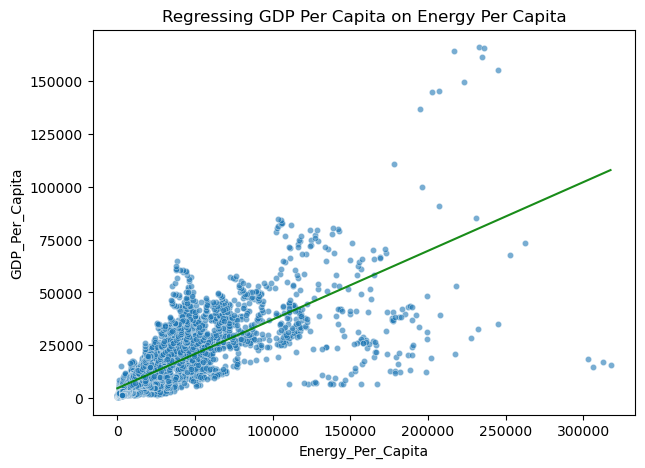

In [36]:
reg_df = df_energy[['energy_per_capita', 'gdp_per_capita', 'year', 'country']]
reg_df = reg_df[reg_df['energy_per_capita'] < 350000]

# Generate the x-axis values for predicting the dependent variable
x = pd.DataFrame({'energy_per_capita': np.linspace(reg_df.energy_per_capita.min(), reg_df.energy_per_capita.max(), len(reg_df.energy_per_capita))})

#generate the the regression model
mod = smf.ols(formula = 'gdp_per_capita ~ energy_per_capita', data = reg_df).fit()

#plot the actual data
sns.scatterplot(x = 'energy_per_capita', y = 'gdp_per_capita', data = reg_df, s=20, alpha=0.6)
plt.xlabel('Energy_Per_Capita'); plt.ylabel('GDP_Per_Capita')
plt.title("Regressing GDP Per Capita on Energy Per Capita")

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.energy_per_capita, mod.predict(x), 'g-', alpha=0.9)

display(mod.summary())

The omnibus and Jarque-Bera tests show that the residuals are not normally distributed while Durbin-Watson test shows that there is autocorrelation between the energy values meaning that the energy values depend on each other.  This makes sense as this is time series data.  There are a lot of outliers, and the variance about the regression line is not equal. This all means that this model is very flawed and won't make good predictions.  Nevertheless, the coefficient is significant, meaning that this model does show that there is a strong positive relationship between energy usage per capita and gdp per capita overall throughout the countries of the world.

As the eda from before showed this holds true for smaller values of energy usage, but can become untrue for large values of energy usage.